<a href="https://colab.research.google.com/github/Nithya1111/Python_Data_Science_Course/blob/master/EDA_Assignment_Day_14_Nithya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1 style="background-color:orange; color:white"><br>Exploratory Data Analysis<br></h1></center>

# `Problem Statement:`
We have used Cars dataset from kaggle  with features including make, model, year, engine, and other properties of the car used to predict its price.

## `Importing the necessary libraries`





In [2]:
!git clone https://github.com/Nithya1111/Twilearn

Cloning into 'Twilearn'...


In [4]:
!pip install geopandas

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## `Load the dataset into dataframe`

In [11]:
# load the csv file
df = pd.read_csv('Twilearn/Cars_data.csv')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
## print the head of the dataframe

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Now we observe the each features present in the dataset.<br>

 `Make:` The Make feature is the company name of the Car.<br>
`Model:` The Model feature is the model or different version of Car models.<br>
`Year:`  The year describes the model has been launched.<br>
`Engine Fuel Type:` It defines the Fuel type of the car model.<br>
`Engine HP:` It's say the Horsepower that refers to the power an engine produces.<br>
`Engine Cylinders:` It define the nos of cylinders in present in the engine.<br>
`Transmission Type:` It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>
`Driven_Wheels:` The type of wheel drive.<br>
`No of doors:` It defined nos of doors present in the car.<br>
`Market Category:` This features tells about the type of car or which category the car belongs. <br>
`Vehicle Size:` It's say about the about car size.<br>
`Vehicle Style:` The feature is all about the style that belongs to car.<br>
`highway MPG:` The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.<br>
`city mpg:` City MPG refers to driving with occasional stopping and braking.<br>
`Popularity:` It can refered to rating of that car or popularity of car.<br>
`MSRP:` The price of that car.







## `Check the datatypes`

In [14]:
# Get the datatypes of each columns number of records in each column.
df.shape



(11914, 16)

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## `Dropping irrevalent columns`

If we consider all columns present in the dataset then unneccessary columns will impact on the model's accuracy.<br>
Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us. It would reflect our model's accucary so we need to drop them. Otherwise it will affect our model.


The list cols_to_drop contains the names of the cols that are irrevalent, drop all these cols from the dataframe.


`cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]`

These features are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset.

In [15]:
# initialise cols_to_drop

cols_to_drop = ['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size']

In [16]:
# drop the irrevalent cols and print the head of the dataframe
df = df.drop(cols_to_drop, axis=1)


In [17]:
print(df.head())

  Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500  


## `Renaming the columns`

Now, Its time for renaming the feature to useful feature name. It will help to use them in model training purpose.<br>

We have already dropped the unneccesary columns, and now we are left with useful columns. One extra thing that we would do is to rename the columns such that the name clearly represents the essence of the column.

The given dict represents (in key value pair) the previous name, and the new name for the dataframe columns

In [ ]:
# rename cols
rename_cols = {'Make': 'make', 'Model': 'model', 'Year': 'year', 'Engine HP': 'engine_hp', 'Engine Cylinders': 'engine_cyl', 'Transmission Type': 'transmission_type', 'Driven_Wheels': 'wheels', 'highway MPG': 'hiway_mpg', 'city mpg': 'city_mpg', 'MSRP': 'msrp'}


In [20]:
# use a pandas function to rename the current columns -
df = df.rename(rename_cols, axis = 1)


In [21]:
# Print the head of the dataframe

print(df.head())

  make       model  year  engine_hp  engine_cyl transmission_type  \
0  BMW  1 Series M  2011      335.0         6.0            MANUAL   
1  BMW    1 Series  2011      300.0         6.0            MANUAL   
2  BMW    1 Series  2011      300.0         6.0            MANUAL   
3  BMW    1 Series  2011      230.0         6.0            MANUAL   
4  BMW    1 Series  2011      230.0         6.0            MANUAL   

             wheels  hiway_mpg  city_mpg   msrp  
0  rear wheel drive         26        19  46135  
1  rear wheel drive         28        19  40650  
2  rear wheel drive         28        20  36350  
3  rear wheel drive         28        18  29450  
4  rear wheel drive         28        18  34500  


## `Dropping the duplicate rows`

There are many rows in the dataframe which are duplicate, and hence they are just repeating the information. Its better if we remove these rows as they don't add any value to the dataframe.

For given data, we would like to see how many rows were duplicates. For this, we will count the number of rows, remove the dublicated rows, and again count the number of rows.

In [22]:
# number of rows before removing duplicated rows
df_dpl = df[df.duplicated(['make', 'model', 'year', 'engine_hp', 'engine_cyl', 'transmission_type', 'wheels', 'hiway_mpg', 'city_mpg', 'msrp'])]


In [23]:
# drop the duplicated rows
df = df.drop_duplicates(df_dpl)

# print head of df
print(df.head())


  make       model  year  engine_hp  engine_cyl transmission_type  \
0  BMW  1 Series M  2011      335.0         6.0            MANUAL   
1  BMW    1 Series  2011      300.0         6.0            MANUAL   
2  BMW    1 Series  2011      300.0         6.0            MANUAL   
3  BMW    1 Series  2011      230.0         6.0            MANUAL   
4  BMW    1 Series  2011      230.0         6.0            MANUAL   

             wheels  hiway_mpg  city_mpg   msrp  
0  rear wheel drive         26        19  46135  
1  rear wheel drive         28        19  40650  
2  rear wheel drive         28        20  36350  
3  rear wheel drive         28        18  29450  
4  rear wheel drive         28        18  34500  


In [24]:
# Count Number of rows after deleting duplicated rows
df.shape


(10925, 10)

## `Dropping the null or missing values`

Missing values are usually represented in the form of Nan or null or None in the dataset.

Finding whether we have null values in the data is by using the isnull() function.

There are many values which are missing, in pandas dataframe these values are reffered to as np.nan. We want to deal with these values beause we can't use nan values to train models. Either we can remove them to apply some strategy to replace them with other values.

To keep things simple we will be dropping nan values

In [25]:
# check for nan values in each columns
df[['engine_hp','engine_cyl']].value_counts()
df[['engine_hp','engine_cyl']].isnull().sum()

engine_hp     69
engine_cyl    30
dtype: int64

As we can see that the HP and Cylinders have null values of 69 and 30. As these null values will impact on models' accuracy. So to avoid the impact we will drop the these values. As these values are small camparing with dataset  that will not impact any major affect on model accuracy so we will drop the values.

In [ ]:
# drop missing values
df = df.dropna(subset=['engine_hp','engine_cyl'])


In [ ]:
# Make sure that missing values are removed
# check number of nan values in each col again
df[['engine_hp','engine_cyl']].isnull().sum()


engine_hp     0
engine_cyl    0
dtype: int64

In [ ]:
#Describe statistics of df
df.describe()


,year,engine_hp,engine_cyl,hiway_mpg,city_mpg,msrp
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


## `Removing outliers`

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

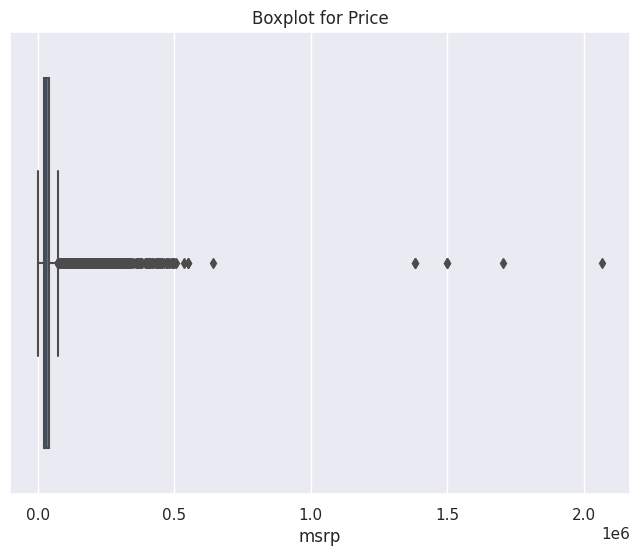

In [27]:
## Plot a boxplot for 'Price' column in dataset.
plt.figure(figsize=(8,6))
sns.boxplot(x=df['msrp'])
plt.title("Boxplot for Price")
plt.show()


### **`Observation:`**<br>

Here as you see that we got some values near to 1.5 and 2.0 . So these values are called outliers. Because there are away from the normal values.
Now we have detect the outliers of the feature of Price. Similarly we will checking of anothers features.

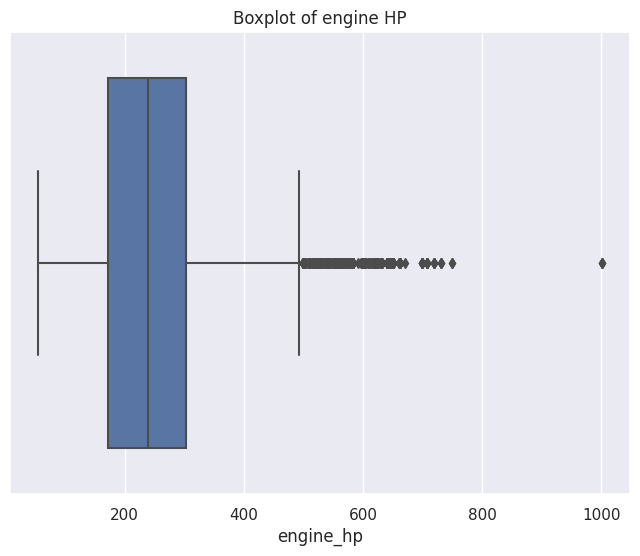

In [28]:
## PLot a boxplot for 'HP' columns in dataset
plt.figure(figsize=(8,6))
sns.boxplot(x=df['engine_hp'])
plt.title("Boxplot of engine HP")
plt.show()


### **`Observation:`**<br>
Here boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of HP.

print all the columns which are of int or float datatype in df.

Hint: Use loc with condition

In [31]:
# print all the columns which are of int or float datatype in df.

num_col = df.columns[df.dtypes.loc[lambda x: x.isin([int, float])]]
num_col

Index([], dtype='object')

### `Save the column names of the above output in variable list named 'l'`


In [30]:
# save column names of the above output in variable list
l=list(num_col)
l

[]

## **`Outliers removal techniques - IQR Method`**


**Here comes cool Fact for you!**

IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

- Calculate IQR  and give a suitable threshold to remove the outliers and save this new dataframe into df2.

Let us help you to decide threshold: Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or above (Q3 + 1.5x IQR)

In [ ]:
## define Q1 and Q2
# Q1 =
# Q3 =

# # define IQR (interquantile range)
# IQR =

# # define df2 after removing outliers
# df2 =


In [ ]:
# find the shape of df & df2




In [ ]:
# find unique values and there counts in each column in df using value counts function.

# for i in df.columns:
#     print ("--------------- %s ----------------" % i)
#     # code here

## `Visualising Univariate Distributions`

We will use seaborn library to visualize eye catchy univariate plots.

Do you know? you have just now already explored one univariate plot. guess which one? Yeah its box plot.


### `Histogram & Density Plots`

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

In [ ]:
#ploting distplot for variable HP



### **`Observation:`**
We plot the Histogram of feature HP with help of distplot in seaborn.<br>
In this graph we can see that there is max values near at 200. similary we have also the 2nd highest value near 400 and so on. <br>
It represents the overall distribution of continuous data variables.<br>

Since seaborn uses matplotlib behind the scenes, the usual matplotlib functions work well with seaborn. For example, you can use subplots to plot multiple univariate distributions.
- Hint: use matplotlib subplot function

In [ ]:
# plot all the columns present in list l together using subplot of dimention (2,3).


# c=0
# plt.figure(figsize=(15,10))
# for i in l:
#     # code here
# plt.show()


## `Bar Chart Plots`


Plot a histogram depicting the make in X axis and number of cars in y axis. <br>

In [ ]:
# plt.figure(figsize = (12,8))

# use nlargest and then .plot to get bar plot like below output
# Plot Title, X & Y label



### **`Observation:`**
In this plot we can see that we have plot the bar plot with the cars model and nos. of cars.

### `Count Plot`
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.


 Plot a countplot for a variable Transmission vertically with hue as Drive mode

In [ ]:
# plt.figure(figsize=(15,5))

# plot countplot on transmission and drive mode




### **`Observation:`**
In this count plot, We have plot the feature of Transmission with help of hue.<br>
We can see that the the nos of count and the transmission type and automated manual is plotted. Drive mode as been given with help of hue.<br>


# `Visualising Bivariate Distributions`


Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.




## `Scatter Plots`
Scatterplots are used to find the correlation between two continuos variables.

Using scatterplot find the correlation between 'HP' and 'Price' column of the data.



In [ ]:
## Your code here -
# fig, ax = plt.subplots(figsize=(10,6))

# plot scatterplot on hp and price




### **`Observation:`**<br>
It is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.<br>
We have plot the scatter plot with x axis as HP and y axis as Price.<br>
The data points between the features should be same either wise it give errors.<br>


## `Plotting Aggregated Values across Categories`


### `Bar Plots - Mean, Median and Count Plots`



Bar plots are used to **display aggregated values** of a variable, rather than entire distributions. This is especially useful when you have a lot of data which is difficult to visualise in a single figure.

For example, say you want to visualise and *compare the Price across Cylinders*. The ```sns.barplot()``` function can be used to do that.


In [ ]:
# bar plot with default statistic=mean between Cylinder and Price






### **`Observation:`**<br>
By default, seaborn plots the mean value across categories, though you can plot the count, median, sum etc.<br>
Also, barplot computes and shows the confidence interval of the mean as well.



## `When you want to visualise having a large number of categories, it is helpful to plot the categories across the y-axis.`

### `Let's now drill down into Transmission sub categories.`

In [ ]:
# Plotting categorical variable Transmission across the y-axis




These plots looks beutiful isn't it? In Data Analyst life such charts are there unavoidable friend.:)

# `Multivariate Plots`



## `Heatmaps`


A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

Using heatmaps plot the correlation between the features present in the dataset.

In [ ]:
#find the correlation of features of the data
# corr =

# print corr


In [ ]:
# Using the correlated df, plot the heatmap
# set cmap = 'BrBG', annot = True - to get the same graph as shown below
# set size of graph = (12,8)




### **`Observation:`**<br>
A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.


The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1.
